# Project Objective
- We have limited data on these merchants and their transactions, but we are still interested in understanding their payments activity to try to infer the types of merchants using the payment platform. Using only the given data, how would you identify different kinds of businesses in the sample? Please generate assignments for each merchant.
- Sometimes a merchant may stop processing with the payment platform, which we call churn. We are interested in identifying and predicting churn. Please a) come up with a concrete definition for churn b) identify merchants that have already churned in the dataset, and c) build a model to predict which active merchants are most likely to churn in the near future.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Visualize Data

In [2]:
# load dataset
# file_dir = ''
dataset = pd.read_csv(file_dir)
dataset.head()

Unnamed: 0    merchant                 time  amount_usd_in_cents
0           1  faa029c6b0  2034-06-17 23:34:14                 6349
1           2  ed7a7d91aa  2034-12-27 00:40:38                 3854
2           3  5608f200cf  2034-04-30 01:29:42                  789
3           4  15b1a0d61e  2034-09-16 01:06:23                 4452
4           5  4770051790  2034-07-22 16:21:42                20203

In [3]:
# check if there are missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513719 entries, 0 to 1513718
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Unnamed: 0           1513719 non-null  int64 
 1   merchant             1513719 non-null  object
 2   time                 1513719 non-null  object
 3   amount_usd_in_cents  1513719 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ MB


In [4]:
dataset.isna().any()

Unnamed: 0             False
merchant               False
time                   False
amount_usd_in_cents    False
dtype: bool

In [5]:
dataset.describe()

Unnamed: 0  amount_usd_in_cents
count  1.513719e+06         1.513719e+06
mean   7.568600e+05         1.548466e+04
std    4.369732e+05         6.161886e+04
min    1.000000e+00         2.010000e+02
25%    3.784305e+05         3.215000e+03
50%    7.568600e+05         6.104000e+03
75%    1.135290e+06         1.260600e+04
max    1.513719e+06         2.592028e+07

In [6]:
dataset['amount_usd']=dataset.amount_usd_in_cents/100
dataset.amount_usd.sum()

234394253.01999992

In [7]:
# count number of unique merchants (by merchant column)
nLedger = dataset.size
merchantCount = dataset.merchant.value_counts()
len(merchantCount)
# merchantCount.groupby('merchant')
# sns.scatterplot(mechantCount,x='merchant',y='index')

14351

In [8]:
# consolidate all transaction amount data by merchant id (count,total,mean)
df = dataset.groupby(['merchant'])['amount_usd'].aggregate(['count','sum', 'mean'])
df.reset_index()
# df['avg_amoutn_usd_in_cents']= dataset.merchant.value_counts()
df.head()


count     sum        mean
merchant                             
0002b63b92      1   33.79   33.790000
0002d07bba      4  892.78  223.195000
00057d4302     28  295.21   10.543214
000bcff341      1   78.26   78.260000
000ddbf0ca      1  102.99  102.990000

In [9]:
df['sum'].mean()

16332.956102013837

Text(0.5, 1.0, 'histogram of total transaction amount')

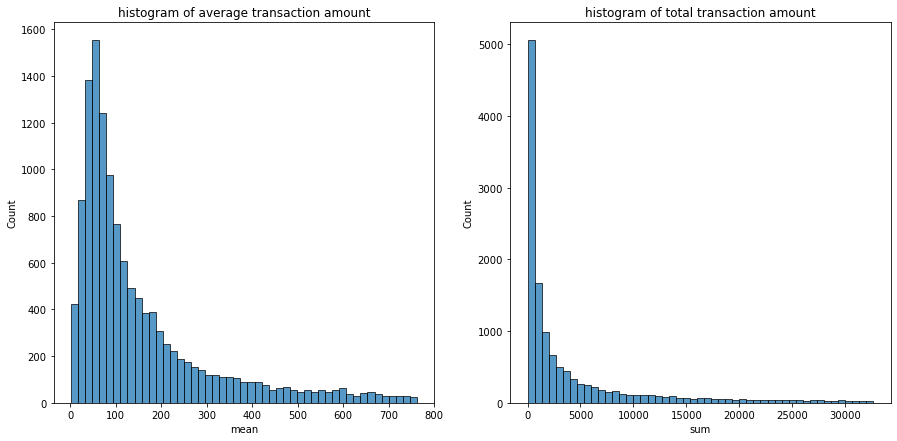

In [10]:
# plot the distribution of merchant transactions(total/average) in a histogram 

fig, axes = plt.subplots(1,2,figsize=(15,7))

binMin, binMax = df['mean'].min(),df['mean'].mean()*2
meanTransBins = np.linspace(binMin, binMax,50)
sns.histplot(df,x='mean',bins=meanTransBins, ax=axes[0])
axes[0].set_title('histogram of average transaction amount')

binMin, binMax = df['sum'].min(),df['sum'].mean()*2
sumTransBins = np.linspace(binMin, binMax,50)
sns.histplot(df,x='sum',bins=sumTransBins, ax=axes[1])
axes[1].set_title('histogram of total transaction amount')

In [13]:
# Check out trans data on the datetime axis
temp = pd.to_datetime(dataset['time'])
df_accumTime = dataset.groupby(temp.dt.floor('D'))['amount_usd']\
    .aggregate(['count','sum', 'mean']).reset_index()
# temp =  pd.to_datetime(dataset['time']) - pd.to_timedelta(7, unit='d')
# df_accumTime = dataset.groupby(pd.Grouper(key=temp,freq='W-MON'))['amount_usd_in_cents']\
#     .aggregate(['count','sum', 'mean']).reset_index()


In [14]:
df_accumTime.head()

time  count       sum       mean
0 2033-01-01     48   4415.40  91.987500
1 2033-01-02     83   4758.62  57.332771
2 2033-01-03     96   6283.53  65.453438
3 2033-01-04    103   4851.11  47.098155
4 2033-01-05    133  10016.21  75.309850

[Text(0.5, 1.0, 'total daily transactions'),
 Text(0, 0.5, 'total daily transactions amount(USD)')]

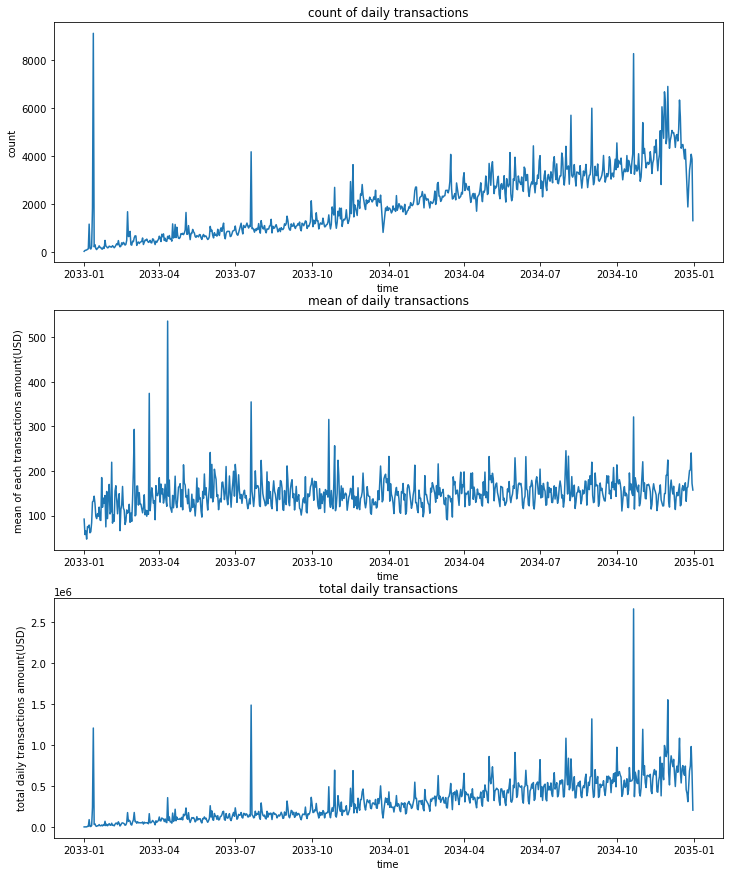

In [13]:
fig, axes = plt.subplots(3,1,figsize=(12,15))
sns.lineplot(x=df_accumTime['time'],y=df_accumTime['count'],ax=axes[0])
axes[0].set(title='count of daily transactions')

sns.lineplot(x=df_accumTime['time'],y=df_accumTime['mean'],ax=axes[1])
axes[1].set(title='mean of daily transactions',ylabel='mean of each transactions amount(USD)')

sns.lineplot(x=df_accumTime['time'],y=df_accumTime['sum'],ax=axes[2])
axes[2].set(title='total daily transactions',ylabel='total daily transactions amount(USD)')

In [15]:
# Group orginal dataset by merchant (look at cross-section)
# a. calculate the average amount per transaction
# b. calculate the time average frequency (monthly or weekly)

# resample weekly
df_actFreq = dataset.filter(['merchant','amount_usd'])
df_actFreq['datetime'] = pd.to_datetime(dataset.time)
df_actFreq = df_actFreq.set_index('datetime')
df_actFreq = df_actFreq.groupby(['merchant']).resample('W').agg({'amount_usd':['count','sum','mean']})


In [16]:
df_actFreq=df_actFreq.reset_index()
df_actFreq.head(10)

merchant   datetime amount_usd                
                              count     sum    mean
0  0002b63b92 2033-05-22          1   33.79   33.79
1  0002d07bba 2034-10-15          1   55.49   55.49
2  0002d07bba 2034-10-22          1  378.30  378.30
3  0002d07bba 2034-10-29          0    0.00     NaN
4  0002d07bba 2034-11-05          0    0.00     NaN
5  0002d07bba 2034-11-12          0    0.00     NaN
6  0002d07bba 2034-11-19          1  438.42  438.42
7  0002d07bba 2034-11-26          0    0.00     NaN
8  0002d07bba 2034-12-03          0    0.00     NaN
9  0002d07bba 2034-12-10          0    0.00     NaN

[Text(0.5, 1.0, 'All mechants total trans amt($) with count of trans')]

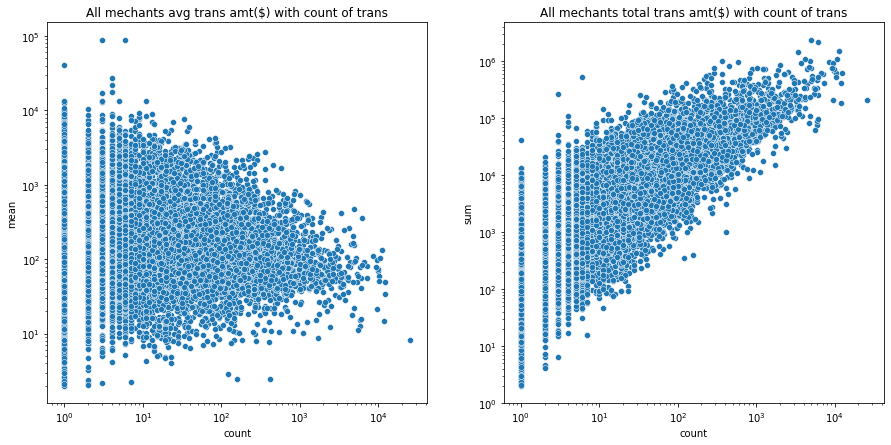

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(data=df,x ='count',y ='mean', ax=ax[0])
ax[0].loglog()
ax[0].set(title='All mechants avg trans amt($) with count of trans')

sns.scatterplot(data=df,x ='count',y ='sum', ax=ax[1])
ax[1].loglog()
ax[1].set(title='All mechants total trans amt($) with count of trans')

takeaway notes:
1. the average transaction size peaks around 5000 cents (50USD)
2. daily transaction amount and daily transaction numbers trends up over 2 year period
3. noticeable amount of one-time user
4. total transaction amount is correlated with counts - transaction amount needs to be normalized by count
5. aspects for further analysis
    - tenure (time span from first and last trans)
    - percent of tenure that have transactions
    - freshness (time to the last trans)

# Customer Segmentation
## Ideas: 
1. Normalize trans amount over counts or active time period
2. transactions (small but many or large but few)
    - avg transaction size over count
    - avg transaction size over tenure
2. time related features
    - frequency (count per month)
    - tenure (time span over 1st and last trans)
    - engagement (percent of month that has non-zero trans)
    - freshness (tenure divided by max possible period)
3. look at both trans transaction/time related features to cluster



## Tenure

In [17]:
# reformat column name of df to be more explicit
df.columns=['transCount','transSum','transMeanPerCount']
    

In [18]:
# Tenure defined by time span from first to last activities (weekly)
df['tenure'] = round((df_actFreq.groupby('merchant')['datetime'].max()\
    - df_actFreq.groupby('merchant')['datetime'].min())/np.timedelta64(1,'W')) + 1
# df['activePeriod'] = df['activePeriod'].fillna(0)
(df.tenure.values<0).any()

False

## Tenure adjusted transaction features

In [19]:
df['transMeanPerTenure'] = df.transSum/df.tenure

In [20]:
df['transCountPerTenure'] = df.transCount/df.tenure

C:\Users\DuanyiWei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

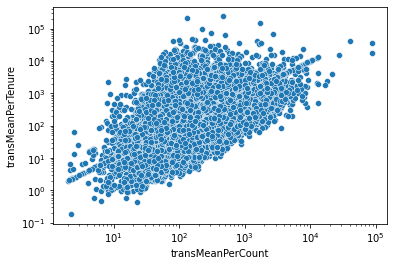

In [21]:
sns.scatterplot(df.transMeanPerCount,df.transMeanPerTenure)
plt.loglog()

<AxesSubplot:xlabel='transCount', ylabel='transCountPerTenure'>

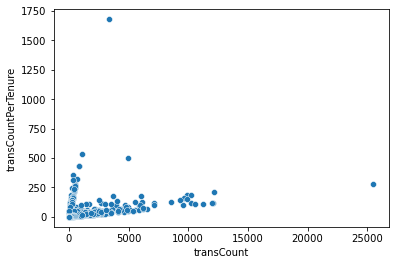

In [22]:
sns.scatterplot(data=df, x='transCount',y='transCountPerTenure')
# plt.loglog()

[]

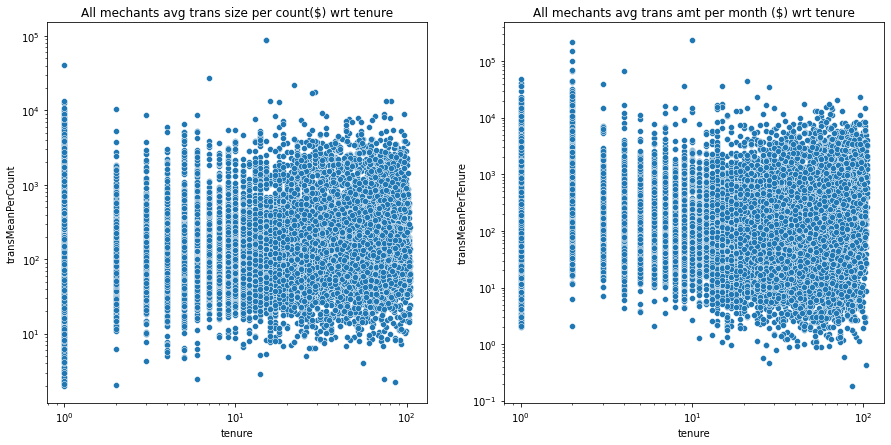

In [23]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(data=df,x ='tenure',y ='transMeanPerCount', ax=ax[0])
ax[0].set(title='All mechants avg trans size per count($) wrt tenure')
ax[0].loglog()

sns.scatterplot(data=df,x ='tenure',y ='transMeanPerTenure', ax=ax[1])
ax[1].set(title='All mechants avg trans amt per month ($) wrt tenure')
ax[1].loglog()


## Engagement

In [26]:
# we can define the engagement metric by looking at percent of month that have activities over its tenure
cols = [('amount_usd','count')]
# df['engagement']=df_actFreq.groupby([('merchant')])[cols].apply(np.count_nonzero)/df.tenure

# refine this definition because one-time user would have engagement of 1
df['engagement']=np.where(df.tenure>1,df_actFreq.groupby([('merchant')])[cols].apply(np.count_nonzero)/df.tenure,0)
(df.engagement.values<0 ).any()
(df.engagement.values>1).any()

False

[None, Text(0.5, 1.0, 'avg trans size over engagement metric')]

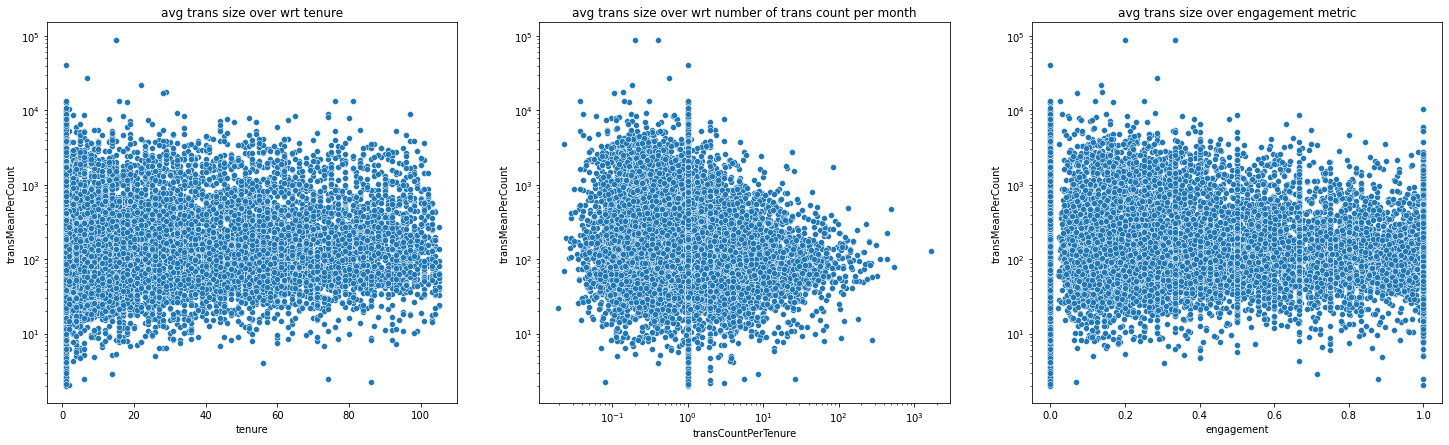

In [27]:
fig, ax = plt.subplots(1,3, figsize=(25,7))
sns.scatterplot(data=df,x ='tenure',y ='transMeanPerCount', ax=ax[0])
ax[0].set(yscale='log',title='avg trans size over wrt tenure')
# ax[0].loglog()

sns.scatterplot(data=df,x ='transCountPerTenure',y ='transMeanPerCount', ax=ax[1])
ax[1].set(title='avg trans size over wrt number of trans count per month')
ax[1].loglog()

sns.scatterplot(data=df,x ='engagement',y ='transMeanPerCount', ax=ax[2])
ax[2].set(yscale='log',title='avg trans size over engagement metric')
# ax[1].loglog()

# sns.scatterplot(data=df,x ='pctActive',y ='transSum', ax=ax[2])
# ax[2].set(yscale='log',title='total trans amt with pct active time')
# # ax[1].loglog()

## Freshness

The freshness can also be defined by ratio between tenure (defined by the time of last transaction) over max possible time-span (from the time of its first trans to the end of 2034), this normalize the measures for existing and new clients. a most fresh client would have ratio close to 1 where it has its last trans recently (end of 2034), while a terminated client has a smaller score under this freshness measure

In [28]:
end_timestamp = pd.to_datetime('2034-12-31')
df['freshness'] = df.tenure /((end_timestamp - df_actFreq.groupby('merchant')['datetime'].min())/np.timedelta64(1,'W')+1)

[None, Text(0.5, 1.0, 'avg trans size over engagement metric')]

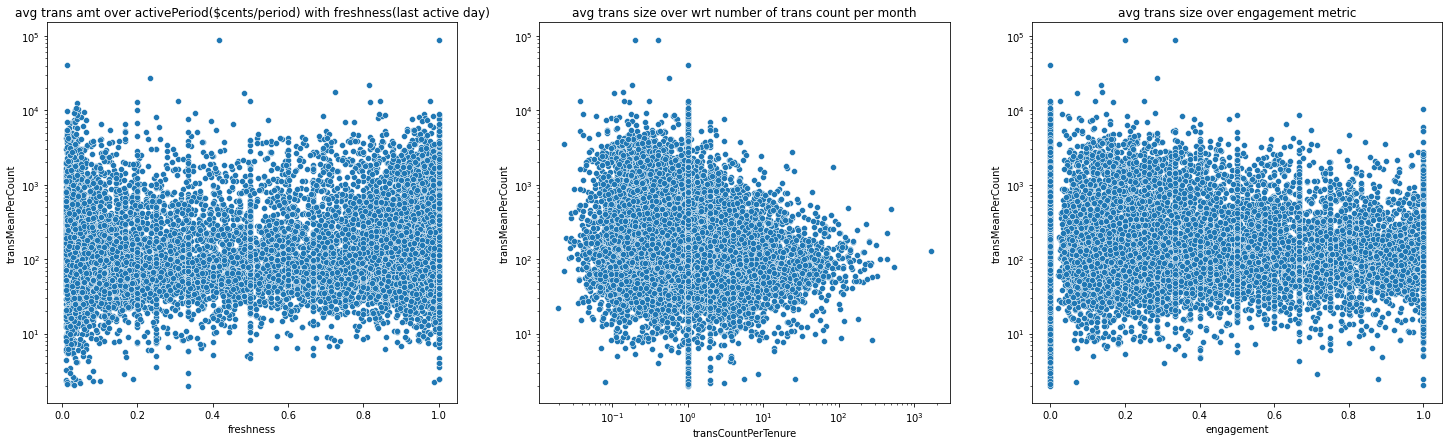

In [29]:
fig, ax = plt.subplots(1,3, figsize=(25,7))
sns.scatterplot(data=df,x ='freshness',y ='transMeanPerCount', ax=ax[0])
ax[0].set(yscale='log',title='avg trans amt over activePeriod($cents/period) with freshness(last active day)')
# ax[0].loglog()

sns.scatterplot(data=df,x ='transCountPerTenure',y ='transMeanPerCount', ax=ax[1])
ax[1].set(title='avg trans size over wrt number of trans count per month')
ax[1].loglog()

sns.scatterplot(data=df,x ='engagement',y ='transMeanPerCount', ax=ax[2])
ax[2].set(yscale='log',title='avg trans size over engagement metric')


Let us combine tenure, frequency, engagement and freshness measures together with transaction amount data. To recap, both measures range from [0,1] and small values indicate less active or less fresh and the opposite for large values for both of these features. 

<AxesSubplot:xlabel='freshness', ylabel='Count'>

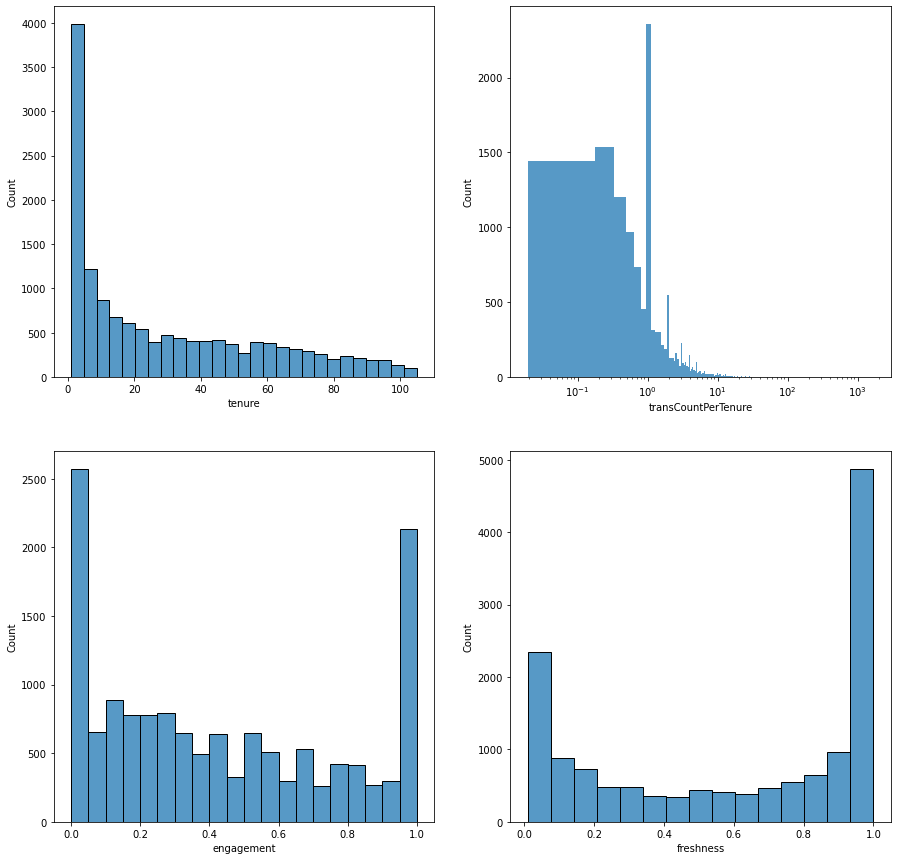

In [30]:
fig, ax = plt.subplots(2,2,figsize = (15,15))
sns.histplot(df['tenure'],ax=ax[0][0])
sns.histplot(df['transCountPerTenure'],ax=ax[0][1])
ax[0][1].set(xscale = 'log')
sns.histplot(df['engagement'],ax=ax[1][0])
sns.histplot(df['freshness'],ax=ax[1][1])


[Text(0.5, 1.0, 'engagement vs. tenure')]

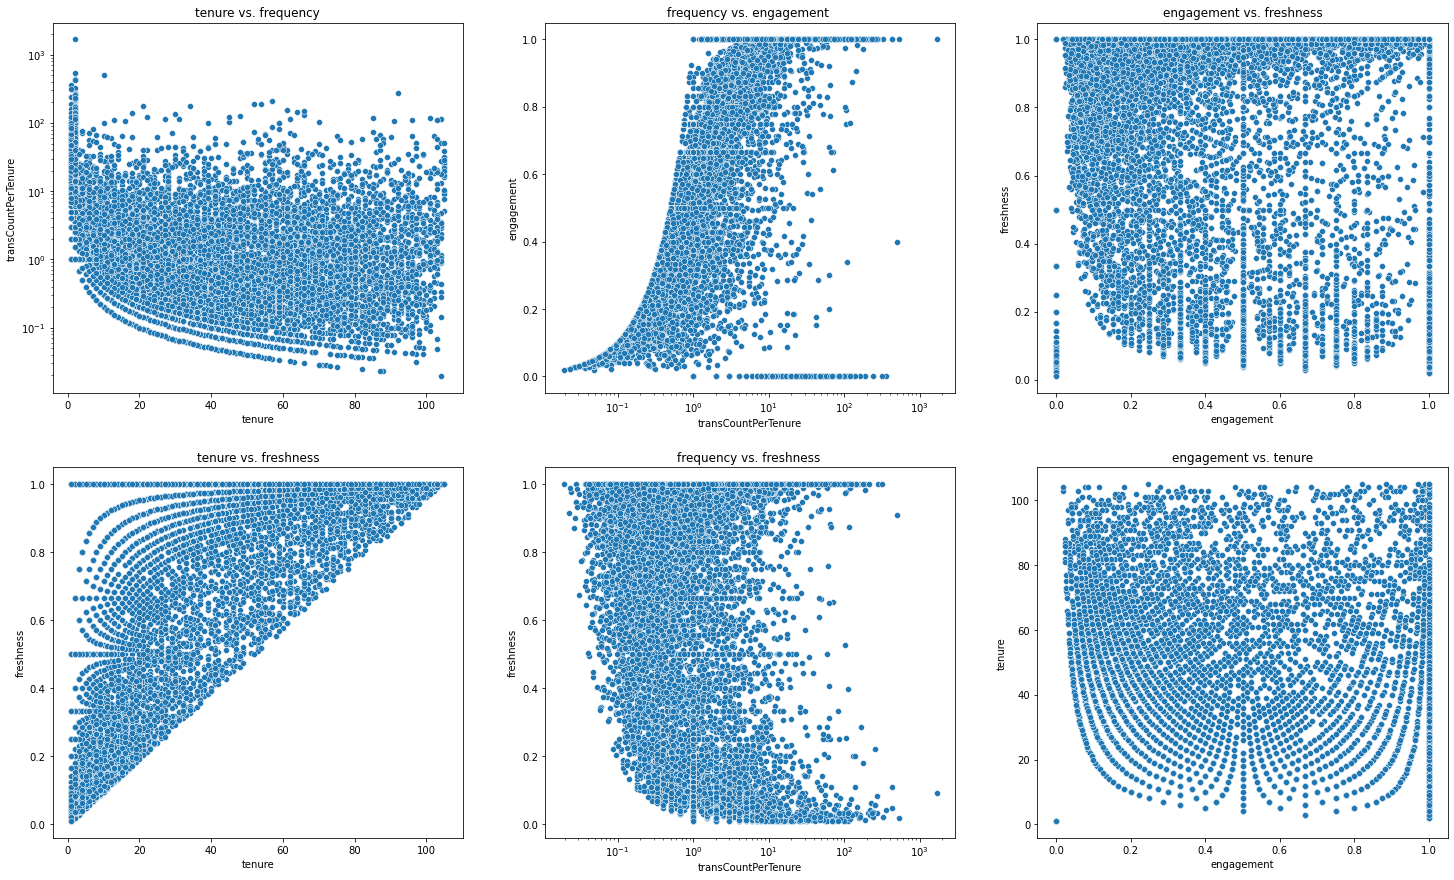

In [31]:
fig, ax = plt.subplots(2,3, figsize=(25,15))
sns.scatterplot(data=df, x='tenure', y='transCountPerTenure',ax=ax[0][0])
ax[0][0].set(yscale='log',title='tenure vs. frequency')

sns.scatterplot(data=df, x='transCountPerTenure', y='engagement',ax=ax[0][1])
ax[0][1].set(xscale='log',title='frequency vs. engagement ')

sns.scatterplot(data=df, x='engagement', y='freshness',ax=ax[0][2])
ax[0][2].set(title='engagement vs. freshness')

sns.scatterplot(data=df, x='tenure', y='freshness',ax=ax[1][0])
ax[1][0].set(title='tenure vs. freshness')

sns.scatterplot(data=df, x='transCountPerTenure', y='freshness',ax=ax[1][1])
ax[1][1].set(xscale='log',title='frequency vs. freshness ')

sns.scatterplot(data=df, x='engagement', y='tenure',ax=ax[1][2])
ax[1][2].set(title='engagement vs. tenure')


There are certain edge cases/anamoly in the data, for example one-time user with engagement = 0, and new users with freshness = 1 and tenure being small

## Model Selection

In [32]:
# Unsupervised multi-classification
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA


In [33]:
df_feature = df[[
        'transCount','transSum','transMeanPerCount','transMeanPerTenure','transCountPerTenure',
        'tenure','engagement','freshness']]

### Feature reduction

We want to reduce the number of features before training the model. We use PCA techniques for feature reduction process

In [34]:
scaler = StandardScaler()
scaled_feature = pd.DataFrame(scaler.fit_transform(df_feature))
scaled_feature.columns = df_feature.columns.values
scaled_feature.index = df_feature.index.values

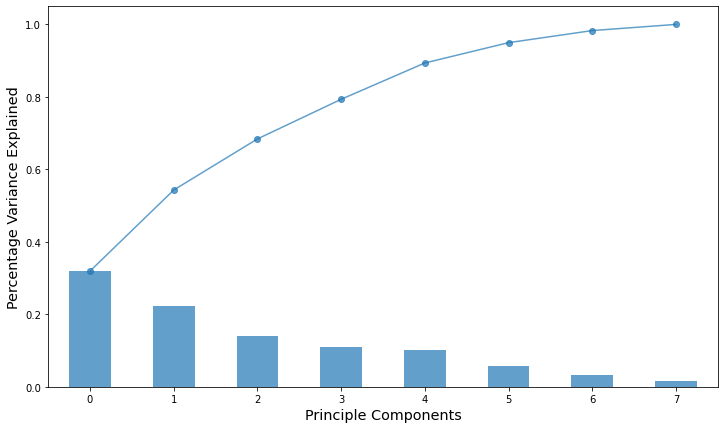

In [35]:
pca = PCA()
pca.fit(scaled_feature)
# sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(12,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
totalVar = 0
varList = []
for x in exp_var:
    totalVar = totalVar+x
    varList.append(totalVar)

pd.Series(varList).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.show()

In [37]:
pca = PCA(n_components=5)
scaled_feature_pca = pca.fit_transform(scaled_feature)

Silhouette coefficient for 2 clusters: 0.346
Silhouette coefficient for 3 clusters: 0.361
Silhouette coefficient for 4 clusters: 0.368
Silhouette coefficient for 5 clusters: 0.369
Silhouette coefficient for 6 clusters: 0.374
Silhouette coefficient for 7 clusters: 0.383
Silhouette coefficient for 8 clusters: 0.392
Silhouette coefficient for 9 clusters: 0.381
Silhouette coefficient for 10 clusters: 0.395


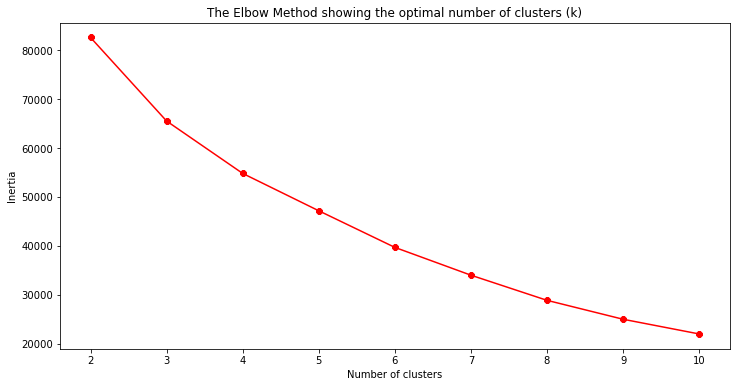

In [38]:
w = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,
                        max_iter=400,
                        n_init=20)
    kmeanModel.fit(scaled_feature_pca)
    w.append(kmeanModel.inertia_)

    silhouette_avg = metrics.silhouette_score(scaled_feature_pca,kmeanModel.labels_)
    print('Silhouette coefficient for %i clusters: %0.3f' % (k, silhouette_avg))

plt.figure(figsize=(12,6))
plt.plot(K, w, color="red", marker ="8")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

In [43]:
kmean = KMeans(n_clusters=5)

kmean.fit(scaled_feature_pca)
y_pred = kmean.predict(scaled_feature_pca)
# scaled_feature = scaled_feature.drop(columns='pred_cluster')
df_feature['kmeans_pred_cluster'] = y_pred

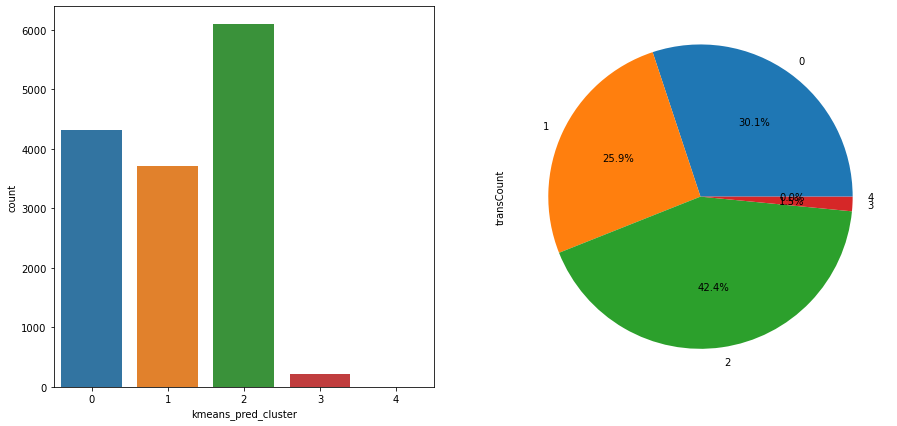

In [44]:
clusterPercent = df_feature.groupby('kmeans_pred_cluster')['transCount'].count()/df_feature.shape[0]
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.countplot(data=df_feature, x='kmeans_pred_cluster',ax=ax[0])

ax[1] = clusterPercent.plot.pie(autopct="%.1f%%")

In [45]:
import plotly.express as px

fig = px.scatter_3d(df_feature, x= 'tenure', y= 'engagement', z = 'freshness',
                    color=df_feature['kmeans_pred_cluster'], labels={'x':'Feature 1', 'y':'Feature 2','z':'Feature 3'} )
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
fig.update_layout(
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
fig.show()

In [42]:
fig = px.scatter_3d(df_feature, z= 'transMeanPerCount', y= 'engagement', x = 'tenure',
                    color=df_feature['kmeans_pred_cluster'])
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
fig.update_layout(
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
fig.show()

## Summary
1. by freshness metric we can see groups of merchants with value 1. it is an indication that these merchants having been recently using the platform either their whole life (new or existing)
2. similarly along the pctActive axis, there is a clear separation of merchants with highest engagement (still with us or one-time user) 
3. at the top right corner of freshness and pctActive, those clients have been with us their whole life (freshness) and has been active all their time with us (100% active)
4. by looking at rest of merchants excluding above group both activeness and freshness features together, it is natural to separate merchants by their activities by a threshold x and by freshness y to indicate different groupings of clients (can we apply ML approach to find the optimal groupings(sum of transMeanActive? for each grouping))

# Churn Analysis
- Sometimes a merchant may stop processing with the payment platform, which we call churn. We are interested in identifying and predicting churn. Please a) come up with a concrete definition for churn b) identify merchants that have already churned in the dataset, and c) build a model to predict which active merchants are most likely to churn in the near future.

In [97]:
# sklearn modules for data preprocessing:from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

# definition of churn
we can look at the idle (time time since last trans) if we are currently at the end of 2 year period, define:
- the idle time > X months
- the idel time > Y % of its tenure
- the idle time > typical inactive period (1-engagement)

In [164]:
df['idleTime'] = (end_timestamp - df_actFreq.groupby('merchant')['datetime'].max())/np.timedelta64(1,'W')
df['churn'] = np.where(df.idleTime> (1-df.engagement) * df.tenure,1,0)
# df['churn'] = np.where(df.idleTime>df.tenure,1,0)
# df['churn'] = np.where(df.idleTime>3,1,0)

C:\Users\DuanyiWei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='churn', ylabel='count'>

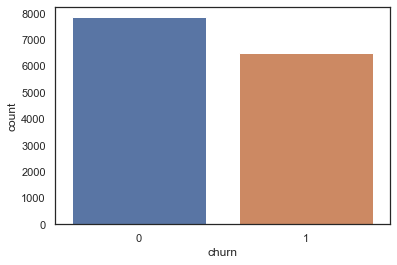

In [165]:
# fig, ax = plt
sns.countplot('churn',data=df)

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

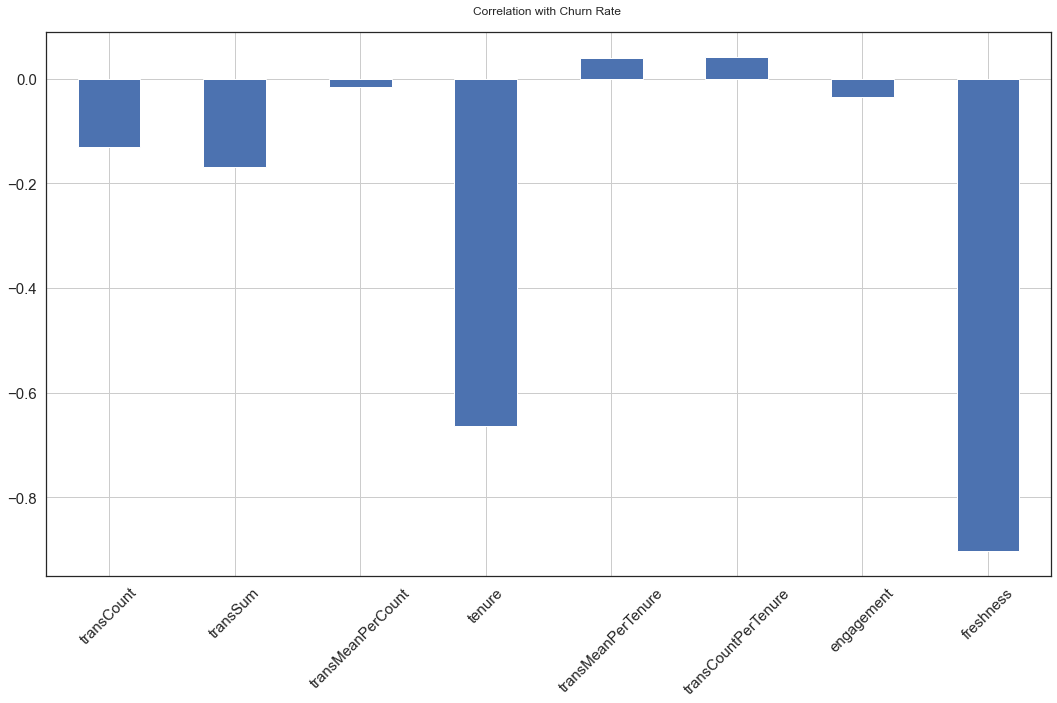

In [167]:
df_feature = df[[
        'transCount','transSum','transMeanPerCount','tenure',
        'transMeanPerTenure','transCountPerTenure','engagement','freshness']]
correlations = df_feature.corrwith(df.churn)
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
    horizontalalignment="center")

C:\Users\DUANYI~1\AppData\Local\Temp/ipykernel_42848/2789965741.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

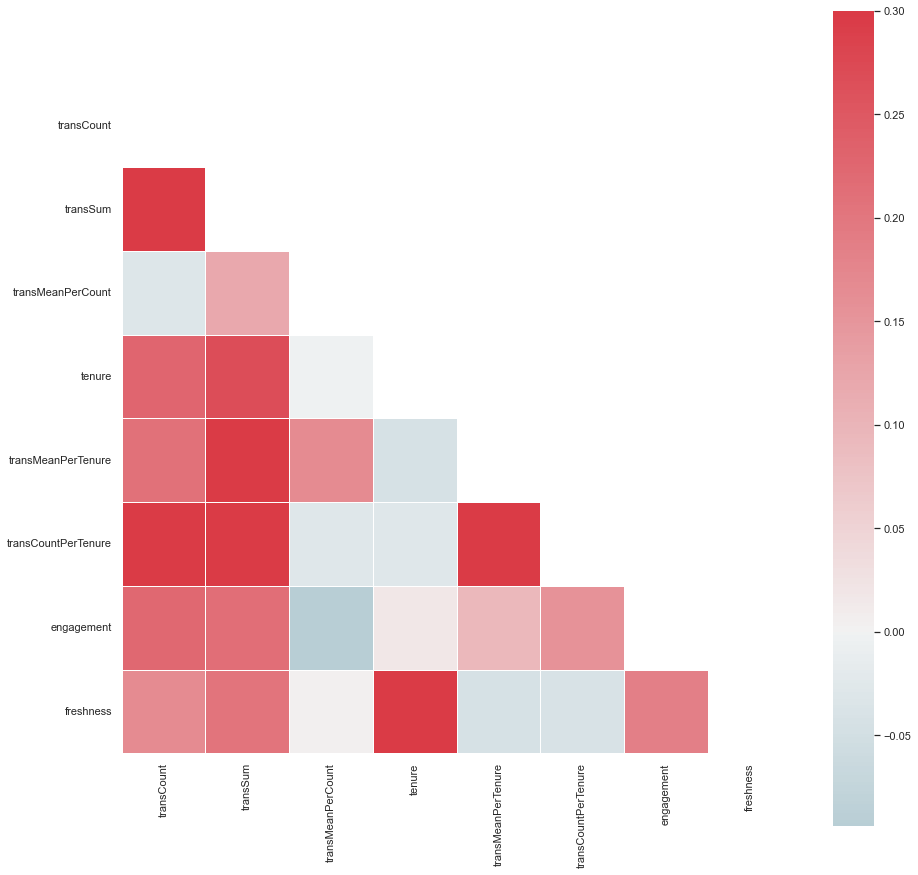

In [168]:

sns.set(style="white")
corr = df_feature.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": 1},)

In [ ]:
df_feature.drop('transSum')

In [169]:
# check collinearity using Variable Inflation Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(df_feature)

variables       VIF
0           transCount  2.224538
1             transSum  2.437257
2    transMeanPerCount  1.146699
3               tenure  4.378420
4   transMeanPerTenure  3.481681
5  transCountPerTenure  3.278517
6           engagement  2.249917
7            freshness  5.938884

In [170]:
df_feature=df_feature.drop(columns='freshness')
calc_vif(df_feature)

variables       VIF
0           transCount  2.221622
1             transSum  2.427447
2    transMeanPerCount  1.132868
3               tenure  1.588210
4   transMeanPerTenure  3.478530
5  transCountPerTenure  3.276193
6           engagement  1.547933

# identify churned merchants

# Data Preprocessing

In [103]:
# split dataset into dependent and independent variables

response = df['churn']
input = df_feature

X_train, X_test, y_train, y_test = train_test_split(input, response, stratify=response, test_size = 0.3)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (10045, 7)
Number transactions y_train dataset:  (10045,)
Number transactions X_test dataset:  (4306, 7)
Number transactions y_test dataset:  (4306,)


In [104]:
# Feature Scaling
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Select Model

In [110]:
models = []
models.append(('Logistic Regression', 
                LogisticRegression(solver='liblinear', random_state = None,
                class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = None)))

models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = None)))

models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))

models.append(('Gaussian Naive Bayes', GaussianNB()))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = None)))
               
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = None)))
    
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)
        
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)

    auc_results.append(cv_auc_results)

    names.append(name)

    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
1                       SVC         91.24         0.80          83.07   
0       Logistic Regression         91.23         0.78          82.67   
4      Gaussian Naive Bayes         90.45         0.97          81.60   
6             Random Forest         89.60         1.14          80.97   
2                Kernel SVM         89.24         1.08          83.62   
3                       KNN         87.99         1.26          81.70   
5  Decision Tree Classifier         76.59         1.60          76.76   

   Accuracy STD  
1          1.16  
0          1.18  
4          1.68  
6          0.94  
2          1.15  
3          1.01  
5          1.84

### Get suitable parameter for the baseline KNN model

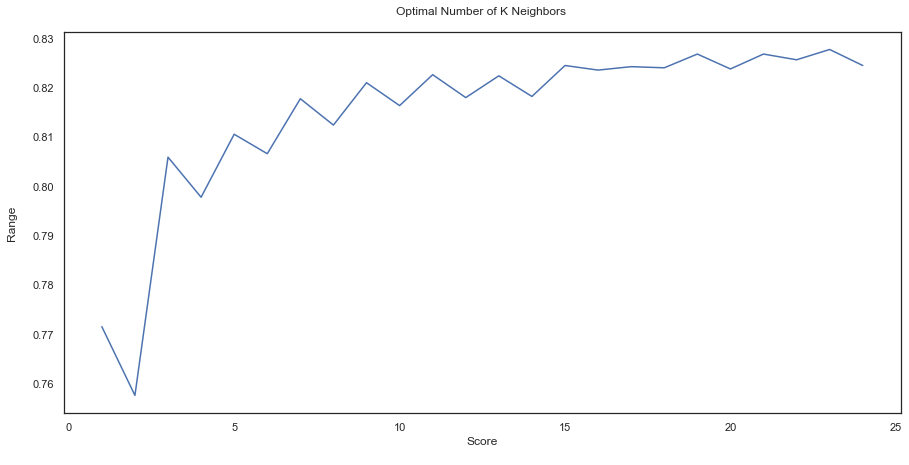

In [108]:
score_array = []
for k in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = k) 
    
    #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array)
plt.ylabel('Range\n',horizontalalignment="center")
plt.xlabel('Score\n',horizontalalignment="center")
plt.title('Optimal Number of K Neighbors \n')
    
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

k = 15 for KNN

# Model Evaluation

## Logistic Regression

In [127]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 
    'F2 Score'])
results = results.sort_values(["Precision", 
    "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.833024    0.78535  0.868718  0.824933  0.850658


## support vector machine

In [128]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame(
    [['SVM (Linear)', acc, prec, rec, f1, f2]],
    columns = ['Model', 'Accuracy', 'Precision', 
    'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
    "Recall", "F2 Score"], ascending = False)

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.833024   0.785350  0.868718  0.824933  0.850658
1         SVM (Linear)  0.830469   0.785047  0.861538  0.821516  0.845070


## K-Nearest Neighbors

In [129]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
    n_neighbors = 15, 
    metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
    acc, prec, rec, f1, f2]], 
    columns = ['Model',
    'Accuracy', 'Precision', 'Recall',
    'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
    "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2  K-Nearest Neighbours  0.824431   0.797904  0.820000  0.808801  0.815483
0   Logistic Regression  0.833024   0.785350  0.868718  0.824933  0.850658
1          SVM (Linear)  0.830469   0.785047  0.861538  0.821516  0.845070


## Kernel SVM

In [130]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
    'Kernel SVM', acc, prec, rec, f1, f2]],
    columns = ['Model', 'Accuracy', 'Precision', 
    'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
3            Kernel SVM  0.833024   0.805763  0.831795  0.818572  0.826455
0  K-Nearest Neighbours  0.824431   0.797904  0.820000  0.808801  0.815483
1   Logistic Regression  0.833024   0.785350  0.868718  0.824933  0.850658
2          SVM (Linear)  0.830469   0.785047  0.861538  0.821516  0.845070


## Naive Bayes

In [131]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([[
    'Naive Bayes', acc, prec, rec, f1, f2]],
    columns = ['Model', 'Accuracy', 'Precision',
    'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
    "Recall", "F2 Score"], ascending = False)
    
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.833024   0.805763  0.831795  0.818572  0.826455
1  K-Nearest Neighbours  0.824431   0.797904  0.820000  0.808801  0.815483
2   Logistic Regression  0.833024   0.785350  0.868718  0.824933  0.850658
3          SVM (Linear)  0.830469   0.785047  0.861538  0.821516  0.845070
4           Naive Bayes  0.821412   0.748422  0.912308  0.822279  0.874030


## Decision Tree

In [132]:
# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([[
    'Decision Tree', acc, prec, rec, f1, f2]],
     columns = ['Model', 'Accuracy', 'Precision', 
    'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
    "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.833024   0.805763  0.831795  0.818572  0.826455
1  K-Nearest Neighbours  0.824431   0.797904  0.820000  0.808801  0.815483
2   Logistic Regression  0.833024   0.785350  0.868718  0.824933  0.850658
3          SVM (Linear)  0.830469   0.785047  0.861538  0.821516  0.845070
4           Naive Bayes  0.821412   0.748422  0.912308  0.822279  0.874030
5         Decision Tree  0.765444   0.745559  0.731795  0.738613  0.734507


## Final Decision - Logistic Regression

In [133]:
classifier = LogisticRegression(random_state = 0,
    penalty = 'l2')
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
    acc, prec, rec, f1, f2]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.833024    0.78535  0.868718  0.824933  0.850658


In [140]:
# k-fold cross validation
accuracies = cross_val_score(estimator = classifier,
    X = X_train, y = y_train, cv = 10)

print("Logistic Regression Classifier Accuracy:%0.2f (+/- %0.2f)",  (accuracies.mean(), 
    accuracies.std() * 2))

Logistic Regression Classifier Accuracy:%0.2f (+/- %0.2f) (0.8300670948048602, 0.02543210430892938)


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

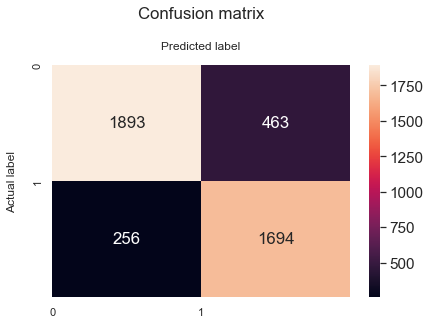

In [141]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

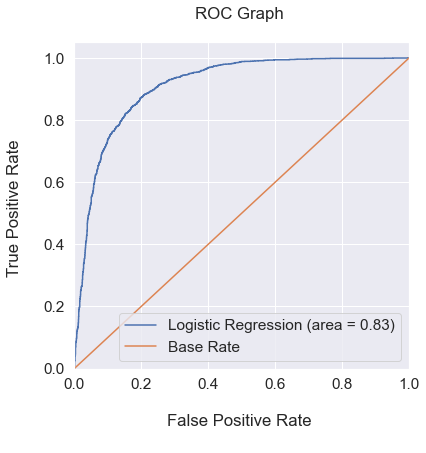

In [159]:
# ROC
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(6, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center")

plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center")

plt.title('ROC Graph \n',horizontalalignment="center")

plt.legend(loc="lower right")
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [147]:
# Analyzing Coefficients

feature_importances = pd.concat([
    pd.DataFrame(df_feature.columns, 
    columns = ["features"]),
    pd.DataFrame(np.transpose(classifier.coef_), 
    columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

features      coef
0           transCount  0.298134
4   transMeanPerTenure  0.177635
5  transCountPerTenure  0.028340
2    transMeanPerCount -0.108229
6           engagement -0.157181
1             transSum -0.340394
3               tenure -2.890312

In [149]:
# Hyperparameter tuning on regularization methods
 
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)

lr_classifier  = lr_classifier.fit(X_train, y_train)

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

C:\Users\DuanyiWei\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DuanyiWei\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DuanyiWei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DuanyiWei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    rais

(0.8338216701331455, {'C': 0.1, 'penalty': 'l2'})

In [150]:
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)

lr_classifier  = lr_classifier.fit(X_train, y_train)

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

(0.8334235709645545, {'C': 0.05, 'penalty': 'l2'})

In [151]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

[[1893  463]
 [ 256 1694]]
Test Data Accuracy: 0.8330


<Figure size 2016x1440 with 0 Axes>

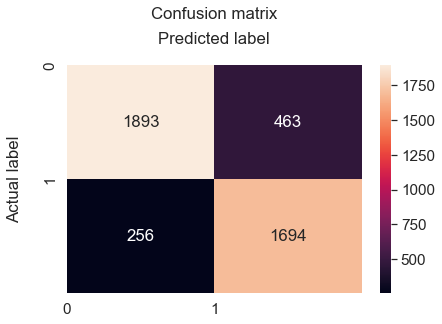

In [155]:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
    rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# predict current active merchants are mostly likely to churn

In [158]:
# Final results
final_results = pd.DataFrame(y_test).dropna()
final_results['predictions'] = y_pred
final_results["prob_to_churn(%)"] = (y_pred_probs*100).round(2)
final_results ['Ranking'] = pd.qcut(final_results['prob_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

print (final_results)


            churn  predictions  prob_to_churn(%) Ranking
merchant                                                
2ed7eef12b      1            0              6.31       8
1818afec49      0            0             34.79       6
20e4739855      0            0              8.78       7
f2f4206bae      0            1             56.71       5
958305cf33      0            0              3.30       8
...           ...          ...               ...     ...
6202b4577e      0            1             63.15       5
46ffdcf021      1            1             80.44       3
c1ceffa57f      0            0              8.21       7
3fe4383f86      0            0             41.52       6
0369c5ceb3      1            1             90.54       1

[4306 rows x 4 columns]
